------
## **PROJECT NAME** : PRCP-1021-InsCostPred
## **PROJECT TEAM ID** : PTID-CDS-JAN-23-1441  
------

### **BUSINESS CASE** : 

* To predict the insurance charges based 
on given inputs.

### **DOMAIN ANLAYSIS :**

Insurance is a policy that helps to cover up all loss or decrease loss in terms of expenses incurred by various risks. A number of variables affect how much insurance costs. These considerations of different factors contribute to the insurance policy cost expression.


* **age:** age of primary beneficiary 

* **sex:** insurance contractor gender, female, male 

* **bmi:** body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* **children:** Number of children covered by health insurance / Number of dependents

* **smoker:** smoking or not Smoking

* **region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

* **charges:** individual medical costs billed by health insurance

###  **IMPORTING THE LIBRARIES :**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the file :

data=pd.read_csv('datasets_13720_18513_insurance(1).csv')

In [ ]:
print('No.of rows in the data :',data.shape[0])
print('No.of columns in the data :',data.shape[1])
data.shape

No.of rows in the data : 1338
No.of columns in the data : 7


(1338, 7)

In [ ]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
data.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
pd.DataFrame(data.columns,columns=['Columns'])

,Columns
0,age
1,sex
2,bmi
3,children
4,smoker
5,region
6,charges


In [ ]:
pd.DataFrame(data.dtypes,columns=['Dtype'])

,Dtype
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
for i in data.columns:
    print(f'No. of unique values in {i} column is :', data[i].unique().size)

No. of unique values in age column is : 47
No. of unique values in sex column is : 2
No. of unique values in bmi column is : 548
No. of unique values in children column is : 6
No. of unique values in smoker column is : 2
No. of unique values in region column is : 4
No. of unique values in charges column is : 1337


In [ ]:
for i in data.columns:
    print(f'No. of unique value counts in {i} column is :',data[i].value_counts().T) 

No. of unique value counts in age column is : 18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64
No. of unique value counts in sex column is : male      676
female    662
Name: sex, dtype: int64
No. of unique value counts in bmi column is : 32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64
No. of unique value counts in children column is : 0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
No. of unique value counts in smoker column is : 

In [ ]:
data.value_counts()

age  sex     bmi     children  smoker  region     charges    
19   male    30.590  0         no      northwest  1639.56310     2
47   male    29.830  3         no      northwest  9620.33070     1
48   female  25.850  3         yes     southeast  24180.93350    1
             22.800  0         no      southwest  8269.04400     1
47   male    47.520  1         no      southeast  8083.91980     1
                                                                ..
31   female  25.740  0         no      southeast  3756.62160     1
             23.600  2         no      southwest  4931.64700     1
             21.755  0         no      northwest  4134.08245     1
30   male    44.220  2         no      southeast  4266.16580     1
64   male    40.480  0         no      southeast  13831.11520    1
Length: 1337, dtype: int64

In [ ]:
data.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [ ]:
data.loc[data.duplicated()==True]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
Numerical_features=[]
Categorical_features=[]

for i in data.columns:
    if (data[i].unique().size)>6:
        Numerical_features.append(i)
    else:
        Categorical_features.append(i)

print('Numerical Features in the dataset are :',Numerical_features)
print('Categorical Features in the dataset are :',Categorical_features)


Numerical Features in the dataset are : ['age', 'bmi', 'charges']
Categorical Features in the dataset are : ['sex', 'children', 'smoker', 'region']


### **EXPLORATORY DATA ANALYSIS :**

##### UNIVARIATE ANAYSIS :

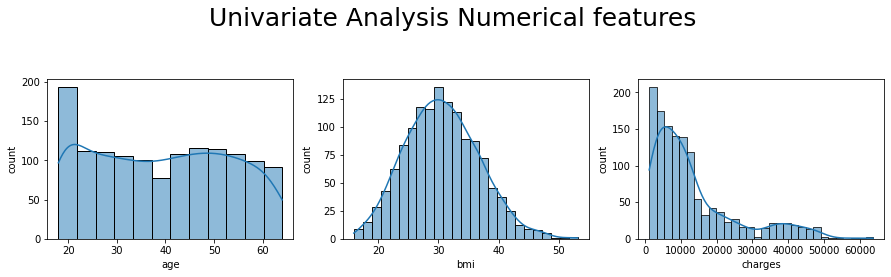

In [ ]:
plt.figure(figsize=(15,10))
pltno=1

for i in Numerical_features:
    
    plt.subplot(3,3,pltno)
    sns.histplot(data[i],kde=True)
    plt.xlabel(i)
    plt.ylabel('count')
    pltno+=1


plt.suptitle('Univariate Analysis Numerical features',fontsize=25)        
plt.show()

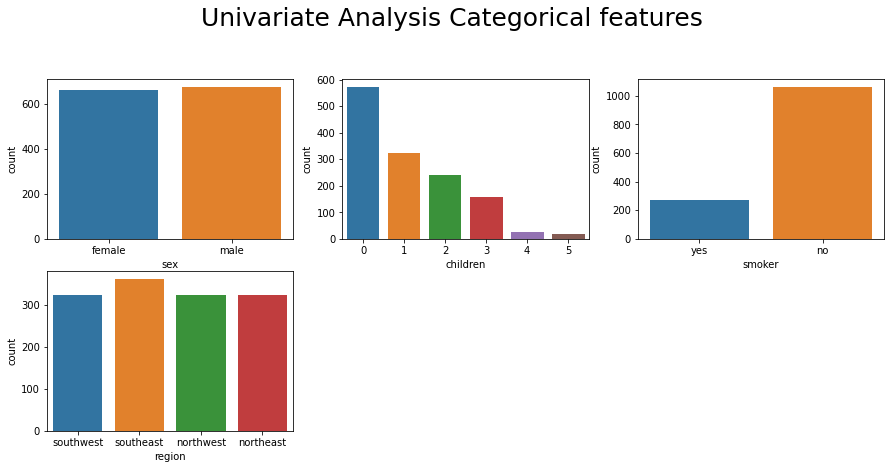

In [ ]:
plt.figure(figsize=(15,10))
pltno=1

for i in Categorical_features:
    plt.subplot(3,3,pltno)
    ax=sns.countplot(x=data[i])
    pltno+=1

plt.suptitle('Univariate Analysis Categorical features',fontsize=25)
plt.show()

**Insights from Univariate Anlaysis :**

- Most of the data has age around 20 to 24 years and the age feature is not normally distributed.

- BMI feature is normally distributed and most of the data is not having ideal BMI.

- The charges target feature is skewed towards right and most of the charges are aroung 0 to 10000.

- Male and female population in the data is mostly equally distributed.

- Most of the data has children feature with 0 or no children.

- In Smoker feature we have data of more non-smokers when compared to smokers.

- Region feature has mostly equally distributed data , in which South East Region has comparatively higher data than others.
 

##### BIVARIATE ANALYSIS :

In [ ]:
Numerical_features.remove('charges')

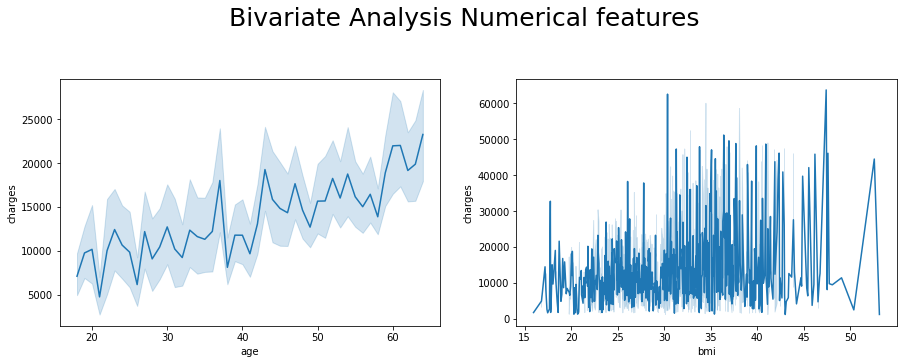

In [ ]:
plt.figure(figsize=(15,10))
pltno=1

for i in Numerical_features:
    plt.subplot(2,2,pltno)
    sns.lineplot(x=data[i],y=data['charges'])
    pltno+=1

plt.suptitle('Bivariate Analysis Numerical features',fontsize=25)
plt.show()    

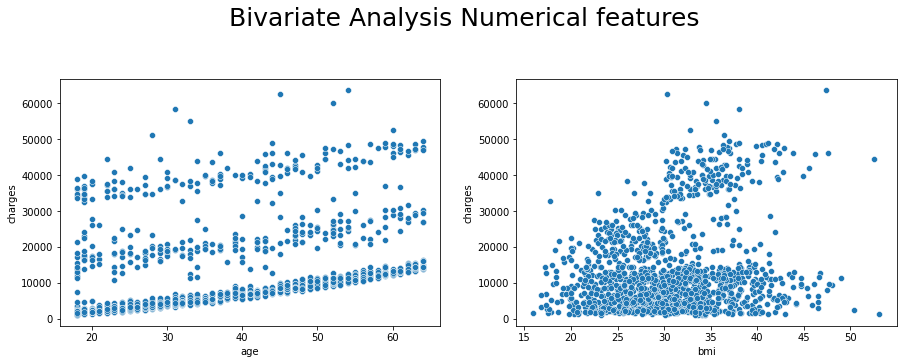

In [ ]:
plt.figure(figsize=(15,10))
pltno=1

for i in Numerical_features:
    plt.subplot(2,2,pltno)
    sns.scatterplot(x=data[i],y=data['charges'])
    pltno+=1

plt.suptitle('Bivariate Analysis Numerical features',fontsize=25)
plt.show()  

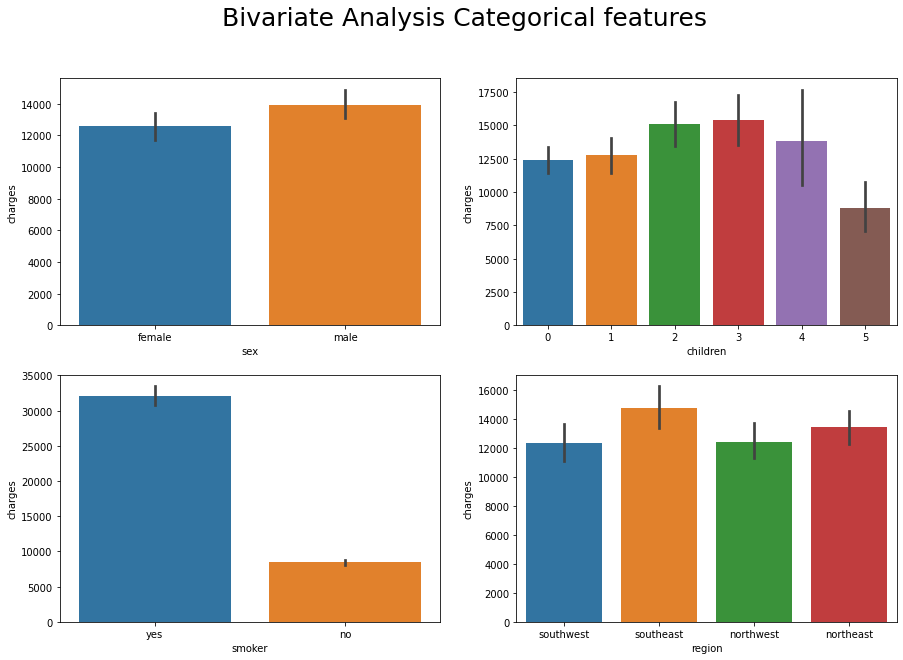

In [ ]:
plt.figure(figsize=(15,10))
pltno=1

for i in Categorical_features:
    plt.subplot(2,2,pltno)
    ax=sns.barplot(x=data[i],y=data['charges'])
    pltno+=1
    #ax.bar_label(ax.containers[-1],label_type='edge')

plt.suptitle('Bivariate Analysis Categorical features',fontsize=25)
plt.show()
    

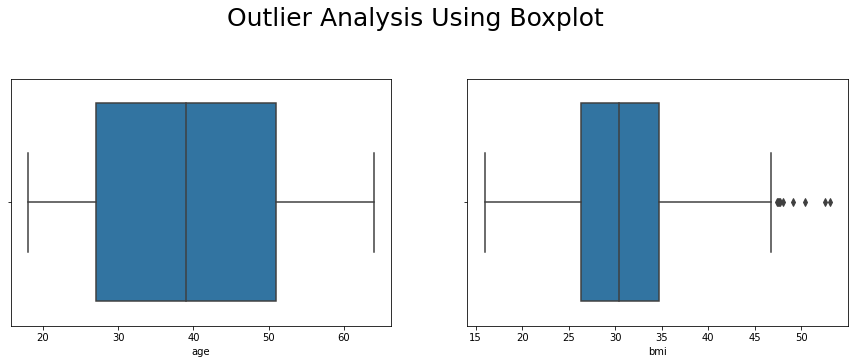

In [ ]:
# Checking for outliers using boxplot :

plt.figure(figsize=(15,10))
pltno=1


for i in Numerical_features:
    plt.subplot(2,2,pltno)
    sns.boxplot(x=data[i])
    pltno+=1

plt.suptitle('Outlier Analysis Using Boxplot',fontsize=25)
plt.show()   

##### TARGET (or) OUTPUT FEATURE ANAYSIS :

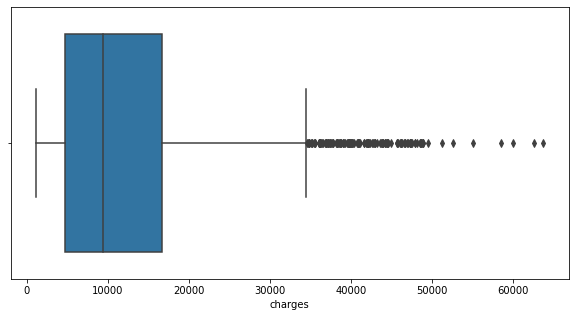

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data['charges'],orient='horizontal')
plt.show()

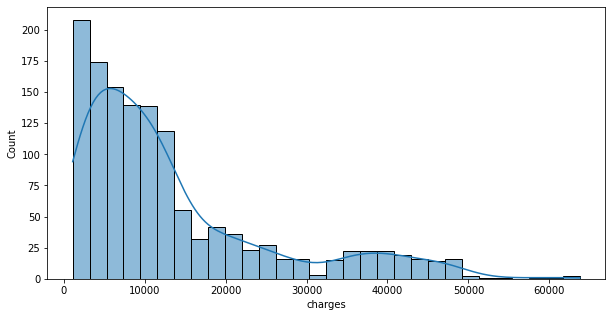

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data['charges'],kde=True)
plt.show()

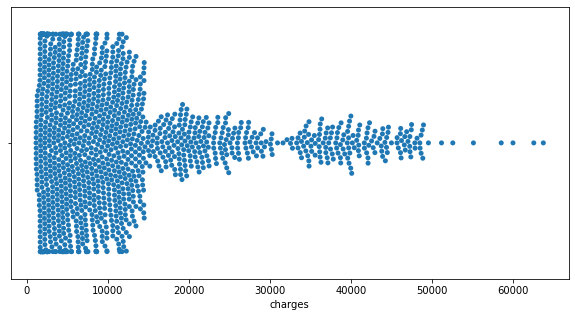

In [ ]:
plt.figure(figsize=(10,5))
sns.swarmplot(data['charges'])
plt.show()

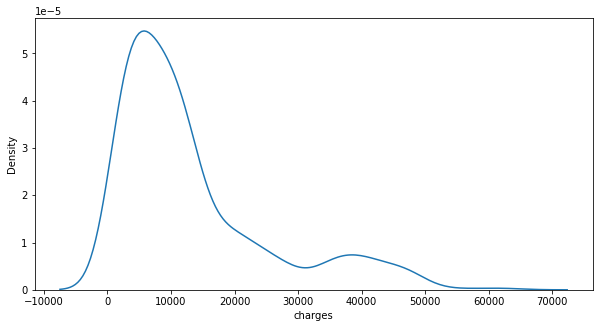

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(data['charges'])
plt.show()

<Figure size 1080x720 with 0 Axes>

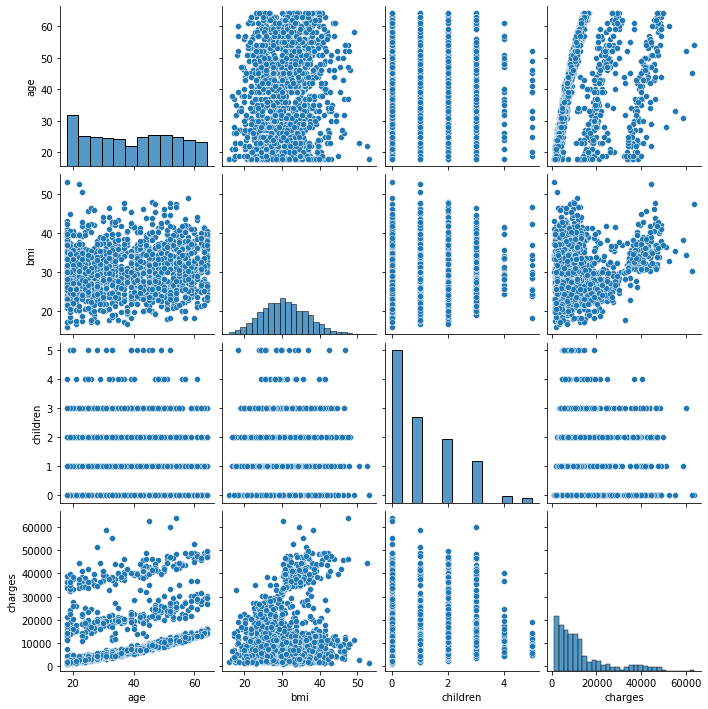

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(data)
plt.show()

In [ ]:
# From pairplot we couldn't observe any much insight.

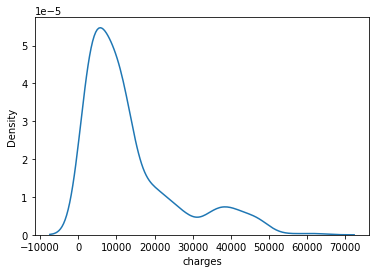

In [ ]:
sns.kdeplot(data.charges)

In [ ]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


**Insights from Bivariate Analysis :**

- In the Line-Plot , we can see that , with increase in age , there is an increase in charges.

- BMI for ideal range has comparatively less charges when compared to BMI out of the ideal range.

- For Smokers , the charges are high when compared to Non-Smokers.

- For male , the charges are comparatively a bit high when compared with females.

- For persons having children 2 and 3 , the premium charges are comparatively high.

- SouthEast region have higer premium charges when compared with other regions.

- For BMI , we found Outliers at the right side and they might fall under obese category. We have to verify it.

- Charges distribution is skewed towards right.


### **DATA PREPROCESSING & FEATURE ENGINEERING :**

In [ ]:
# Step 1-Finding missing values and duplicated values :
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data.loc[data.duplicated()==True]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.loc[data.duplicated()==True]

,age,sex,bmi,children,smoker,region,charges


In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#Step 2- Converting categorical data to numerical

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

data.smoker=LE.fit_transform(data.smoker)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [ ]:
object_data=data.select_dtypes('object')
object_data

,sex,region
0,female,southwest
1,male,southeast
2,male,southeast
3,male,northwest
4,male,northwest
...,...,...
1333,male,northwest
1334,female,northeast
1335,female,southeast
1336,female,southwest


In [ ]:
encoded=pd.get_dummies(object_data,drop_first=True)
encoded

,sex_male,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,1,0,1,0
2,1,0,1,0
3,1,1,0,0
4,1,1,0,0
...,...,...,...,...
1333,1,1,0,0
1334,0,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [ ]:
df=data.copy()

In [ ]:
list(object_data.columns)

['sex', 'region']

In [ ]:
df.drop(list(object_data.columns),axis=1,inplace=True)

In [ ]:
df=pd.concat([df,encoded],axis=1)

In [ ]:
df

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,16884.92400,0,0,0,1
1,18,33.770,1,0,1725.55230,1,0,1,0
2,28,33.000,3,0,4449.46200,1,0,1,0
3,33,22.705,0,0,21984.47061,1,1,0,0
4,32,28.880,0,0,3866.85520,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830,1,1,0,0
1334,18,31.920,0,0,2205.98080,0,0,0,0
1335,18,36.850,0,0,1629.83350,0,0,1,0
1336,21,25.800,0,0,2007.94500,0,0,0,1


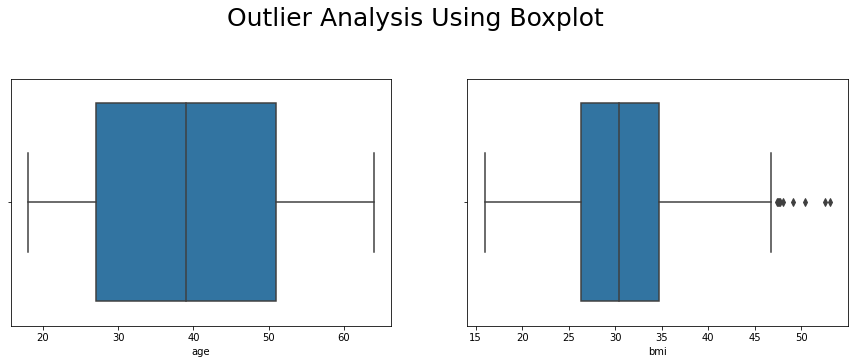

In [ ]:
# Step 3:-Checking & Handling the outliers :

plt.figure(figsize=(15,10))
pltno=1


for i in Numerical_features:
    plt.subplot(2,2,pltno)
    sns.boxplot(x=data[i])
    pltno+=1

plt.suptitle('Outlier Analysis Using Boxplot',fontsize=25)
plt.show()   

In [ ]:
# We have found outliers in the BMI column and we also found that the data in BMI is 'Normally Distributed'.
# So we use 3 Sigma method for this.


lower_limit=df.bmi.mean() - 3*df.bmi.std() #calculating lower limit
print(lower_limit)

upper_limit=df.bmi.mean() + 3*df.bmi.std() #calculating upper limit
upper_limit

12.362046528819015


48.96485698651382

In [ ]:
df.loc[df['bmi']<lower_limit] #checking values which are less than minimum limit

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest


In [ ]:
df.loc[df['bmi']>upper_limit] #checking values which are greater than maximum limit

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
116,58,49.06,0,0,11381.3254,1,0,1,0
847,23,50.38,1,0,2438.0552,1,0,1,0
1047,22,52.58,1,1,44501.3982,1,0,1,0
1317,18,53.13,0,0,1163.4627,1,0,1,0


In [ ]:
df.loc[df['bmi']>upper_limit,'bmi']=np.mean(df.bmi)#imputing value with mean

In [ ]:
df.loc[df['bmi']>upper_limit]

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest


In [ ]:
# Step 4:- Scaling the continous variable:

from sklearn.preprocessing import MinMaxScaler
MMS=MinMaxScaler()


In [ ]:
df.select_dtypes('number')

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,16884.92400,0,0,0,1
1,18,33.770,1,0,1725.55230,1,0,1,0
2,28,33.000,3,0,4449.46200,1,0,1,0
3,33,22.705,0,0,21984.47061,1,1,0,0
4,32,28.880,0,0,3866.85520,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830,1,1,0,0
1334,18,31.920,0,0,2205.98080,0,0,0,0
1335,18,36.850,0,0,1629.83350,0,0,1,0
1336,21,25.800,0,0,2007.94500,0,0,0,1


In [ ]:
df_scale=df[['age','bmi']]

In [ ]:
df_scale

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880
...,...,...
1333,50,30.970
1334,18,31.920
1335,18,36.850
1336,21,25.800


In [ ]:
scaled_df=MMS.fit_transform(df_scale)

In [ ]:
scaled_df

array([[0.02173913, 0.37184678],
       [0.        , 0.55465587],
       [0.2173913 , 0.5306758 ],
       ...,
       [0.        , 0.65057614],
       [0.06521739, 0.30644659],
       [0.93478261, 0.40828402]])

In [ ]:
d1=pd.DataFrame(scaled_df,columns=('age','bmi'))


In [ ]:
d1

,age,bmi
0,0.021739,0.371847
1,0.000000,0.554656
2,0.217391,0.530676
3,0.326087,0.210059
4,0.304348,0.402367
...,...,...
1332,0.695652,0.467456
1333,0.000000,0.497041
1334,0.000000,0.650576
1335,0.065217,0.306447


In [ ]:
d1.isnull().sum()

age    0
bmi    0
dtype: int64

In [ ]:
df

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,16884.92400,0,0,0,1
1,18,33.770,1,0,1725.55230,1,0,1,0
2,28,33.000,3,0,4449.46200,1,0,1,0
3,33,22.705,0,0,21984.47061,1,1,0,0
4,32,28.880,0,0,3866.85520,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830,1,1,0,0
1334,18,31.920,0,0,2205.98080,0,0,0,0
1335,18,36.850,0,0,1629.83350,0,0,1,0
1336,21,25.800,0,0,2007.94500,0,0,0,1


In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df.drop(['age','bmi'],axis=1,inplace=True)

In [ ]:
new_df=pd.concat([df,d1],axis=1)
new_df

,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest,age,bmi
0,0,1,16884.92400,0,0,0,1,0.021739,0.371847
1,1,0,1725.55230,1,0,1,0,0.000000,0.554656
2,3,0,4449.46200,1,0,1,0,0.217391,0.530676
3,0,0,21984.47061,1,1,0,0,0.326087,0.210059
4,0,0,3866.85520,1,1,0,0,0.304348,0.402367
...,...,...,...,...,...,...,...,...,...
1332,3,0,10600.54830,1,1,0,0,0.695652,0.467456
1333,0,0,2205.98080,0,0,0,0,0.000000,0.497041
1334,0,0,1629.83350,0,0,1,0,0.000000,0.650576
1335,0,0,2007.94500,0,0,0,1,0.065217,0.306447


In [ ]:
new_df.isnull().sum()

children            0
smoker              0
charges             0
sex_male            0
region_northwest    0
region_southeast    0
region_southwest    0
age                 0
bmi                 0
dtype: int64

In [ ]:
# APPLYING TRANSFORMATION FOR NORMALIZING TARGET :
# LOG TRANSFORMATION :

new_df.charges=np.log(new_df['charges'])

In [ ]:
new_df

,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest,age,bmi
0,0,1,9.734176,0,0,0,1,0.021739,0.371847
1,1,0,7.453302,1,0,1,0,0.000000,0.554656
2,3,0,8.400538,1,0,1,0,0.217391,0.530676
3,0,0,9.998092,1,1,0,0,0.326087,0.210059
4,0,0,8.260197,1,1,0,0,0.304348,0.402367
...,...,...,...,...,...,...,...,...,...
1332,3,0,9.268661,1,1,0,0,0.695652,0.467456
1333,0,0,7.698927,0,0,0,0,0.000000,0.497041
1334,0,0,7.396233,0,0,1,0,0.000000,0.650576
1335,0,0,7.604867,0,0,0,1,0.065217,0.306447


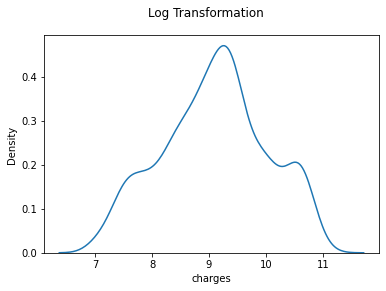

In [ ]:
sns.kdeplot(new_df.charges)
plt.suptitle('Log Transformation')
plt.show()

In [ ]:
new_df.charges.describe()

count    1337.000000
mean        9.099928
std         0.918699
min         7.022756
25%         8.465130
50%         9.146992
75%         9.720629
max        11.063045
Name: charges, dtype: float64

### **FEATURE SELECTION :**

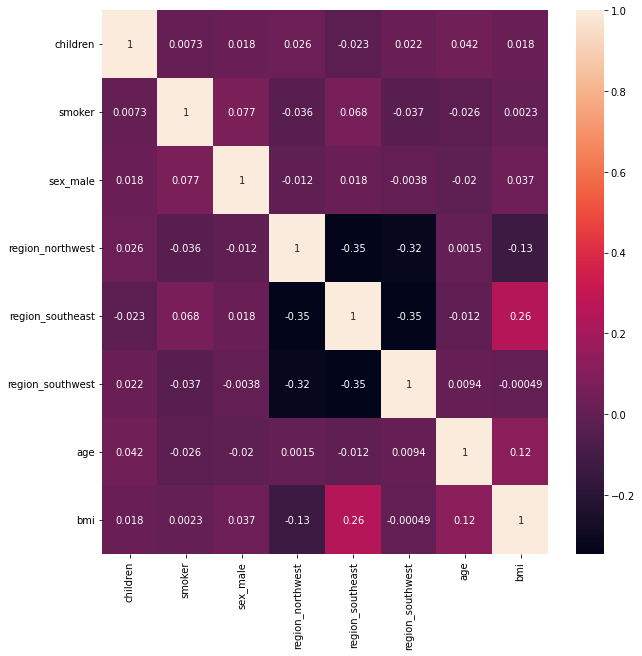

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(new_df.drop('charges',axis=1).corr(),annot=True)
plt.show()

In [ ]:
new_df.corrwith(new_df.charges)

children            0.160336
smoker              0.665718
charges             1.000000
sex_male            0.007009
region_northwest   -0.015425
region_southeast    0.014968
region_southwest   -0.042473
age                 0.526927
bmi                 0.139520
dtype: float64

In [ ]:
(new_df.corrwith(new_df.charges)*100).sort_values(ascending=False)

#  We have very less feature and from anlaysis it is evident we will use 
#  input features : smoker,Age,children,Bmi

charges             100.000000
smoker               66.571781
age                  52.692716
children             16.033589
bmi                  13.951962
region_southeast      1.496798
sex_male              0.700942
region_northwest     -1.542485
region_southwest     -4.247318
dtype: float64

### **MODEL CREATION**

In [ ]:
#Step 1 Independent and dependent variable creation

X=new_df[['smoker','age','children','bmi']]
y=new_df[['charges']]

In [ ]:
X

,smoker,age,children,bmi
0,1,0.021739,0,0.371847
1,0,0.000000,1,0.554656
2,0,0.217391,3,0.530676
3,0,0.326087,0,0.210059
4,0,0.304348,0,0.402367
...,...,...,...,...
1332,0,0.695652,3,0.467456
1333,0,0.000000,0,0.497041
1334,0,0.000000,0,0.650576
1335,0,0.065217,0,0.306447


In [ ]:
y.head()

,charges
0,9.734176
1,7.453302
2,8.400538
3,9.998092
4,8.260197


In [ ]:
# Step 2 Traning and testing data creation :

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=32)

In [ ]:
X_train.shape,y_train.shape

((935, 4), (935, 1))

In [ ]:
X_test.shape,y_test.shape

((402, 4), (402, 1))

In [ ]:
# Step 3 Creating model :

##### **1 ) Creating a Model using LINEAR REGRESSOR :**



In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression() # object creation

LR.fit(X_train,y_train) # training of linear regression
y_predict_lin_test=LR.predict(X_test) #y_predict is the model predicted output

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
MSE=mean_squared_error
MAE=mean_absolute_error

r2score_lin_test=r2_score(y_test,y_predict_lin_test)

In [ ]:
r2score_lin_test

0.759880421370823

In [ ]:
X_test.shape

(402, 4)

In [ ]:
# adjusted r2 score
adj_r2_lin_test=1-(1-r2score_lin_test)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
adj_r2_lin_test

0.7574610805282116

In [ ]:
import math
# Testing Set Calculations : 

print('Testing Set scores : ')
r2score_lin_test=('%.3f'% r2_score(y_test,y_predict_lin_test))
print('r2 :',r2score_lin_test)

adj_r2_lin_test=(round(adj_r2_lin_test,3))
print('adj_r2 :',adj_r2_lin_test,'\n')



print('Testing Set Errors : ')

mse_lin_test=('%.3f'% MSE(y_test,y_predict_lin_test))
print('MSE :',mse_lin_test)
mae_lin_test=('%.3f'% MAE(y_test,y_predict_lin_test))
print('MAE :',mae_lin_test)
rmse_lin_test=('%.3f'% math.sqrt(MSE(y_test,y_predict_lin_test)))
print('RMSE :',rmse_lin_test)


Testing Set scores : 
r2 : 0.760
adj_r2 : 0.757 

Testing Set Errors : 
MSE : 0.206
MAE : 0.283
RMSE : 0.454


In [ ]:
r2score_lin_test,adj_r2_lin_test,mse_lin_test,mae_lin_test,rmse_lin_test

('0.760', 0.757, '0.206', '0.283', '0.454')

In [ ]:
# Training data prediction : 

y_predict_lin_train=LR.predict(X_train)

In [ ]:
r2score_lin_train=r2_score(y_train,y_predict_lin_train)

In [ ]:
r2score_lin_train

0.7626915489856382

In [ ]:
adj_r2_lin_train=1-(1-r2score_lin_train)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
adj_r2_lin_train=(round(adj_r2_lin_train,3))
adj_r2_lin_train

0.762

In [ ]:
# Training Set Calculations : 

print('Training Set scores : ')

r2score_lin_train=('%.3f'% r2_score(y_train,y_predict_lin_train))
print('r2 :',r2score_lin_train)
print('adj_r2 :',adj_r2_lin_train,'\n')


print('Training Set Errors : ')

mse_lin_train=('%.3f'% MSE(y_train,y_predict_lin_train))
print('MSE:',mse_lin_train)
mae_lin_train=('%.3f'% MAE(y_train,y_predict_lin_train))
print('MAE:',mae_lin_train)
rmse_lin_train=( '%.3f'% math.sqrt(MSE(y_train,y_predict_lin_train)))
print('RMSE:',rmse_lin_train)

Training Set scores : 
r2 : 0.763
adj_r2 : 0.762 

Training Set Errors : 
MSE: 0.198
MAE: 0.281
RMSE: 0.445


In [ ]:
r2score_lin_train,adj_r2_lin_train,mse_lin_train,mae_lin_train,rmse_lin_train

('0.763', 0.762, '0.198', '0.281', '0.445')

In [ ]:
# import pandas library
import pandas as pd
  
# dictionary with list object in values
linear_reg_details = { 
    'Testing score' : [r2score_lin_test,adj_r2_lin_test,mse_lin_test,mae_lin_test,rmse_lin_test],
    'Training score' : [r2score_lin_train,adj_r2_lin_train,mse_lin_train,mae_lin_train,rmse_lin_train],
}
 
col=['R2Score','Adj_R2', 'MSE', 'MAE','RMSE']  
lin_score = pd.DataFrame(linear_reg_details,index=col  )
lin_score

,Testing score,Training score
R2Score,0.760,0.763
Adj_R2,0.757,0.762
MSE,0.206,0.198
MAE,0.283,0.281
RMSE,0.454,0.445


##### **2 ) Creating a Model using SVM REGRESSOR :**



In [ ]:
# Support Vector Regressor Model

from sklearn.svm import SVR
svregressor = SVR() ## base model with default parameters
svregressor.fit(X_train,y_train) 

SVR()

In [ ]:
y_predict_svr_test=svregressor.predict(X_test)  # Prediction of test data

# r2 score
r2score_svr_test=r2_score(y_test,y_predict_svr_test)
r2score_svr_test


0.8096833058488696

In [ ]:
# adjusted r2 score
adj_r2_svr_test=1-(1-r2score_svr_test)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
adj_r2_svr_test=(round(adj_r2_svr_test,3))
adj_r2_svr_test

0.808

In [ ]:
# Testing Set Calculations : 

print('Testing Set scores : ')

r2score_svr_test=('%.3f'% r2_score(y_test,y_predict_svr_test))
print('r2 :',r2score_svr_test)
print('adj_r2 :',adj_r2_svr_test,'\n')

print('Testing Set Errors : ')

mse_svr_test=('%.3f'% MSE(y_test,y_predict_svr_test))
print('MSE :',mse_svr_test)
rmse_svr_test=('%.3f'%  np.sqrt(MSE(y_test,y_predict_svr_test)))
print('RMSE :',rmse_svr_test)
mae_svr_test=('%.3f'% MAE(y_test,y_predict_svr_test))
print('MAE :',mae_svr_test)


Testing Set scores : 
r2 : 0.810
adj_r2 : 0.808 

Testing Set Errors : 
MSE : 0.163
RMSE : 0.404
MAE : 0.193


In [ ]:
r2score_svr_test,adj_r2_svr_test,mse_svr_test,mae_svr_test,rmse_svr_test

('0.810', 0.808, '0.163', '0.193', '0.404')

In [ ]:
 # Prediction of training data :

y_predict_svr_train=svregressor.predict(X_train) 

In [ ]:
# r2 score
r2score_svr_train=r2_score(y_train,y_predict_svr_train)
r2score_svr_train

0.8313737915171028

In [ ]:
# adjusted r2 score
adj_r2_svr_train=1-(1-r2score_svr_train)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
adj_r2_svr_train=(round(adj_r2_svr_train,3))
adj_r2_svr_train

0.831

In [ ]:
# Training Set Calculations : 

print('Training Set scores : ')

r2score_svr_train=('%.3f'% r2_score(y_train,y_predict_svr_train))
print('r2:',r2score_svr_train)
print('adj_r2 :',adj_r2_svr_train,'\n')

print('Training Set Errors : ')

mse_svr_train=('%.3f'% MSE(y_train,y_predict_svr_train))
print('MSE:',mse_svr_train)
rmse_svr_train=('%.3f'%  np.sqrt(MSE(y_train,y_predict_svr_train)))
print('RMSE:',rmse_svr_train)
mae_svr_train=('%.3f'% MAE(y_train,y_predict_svr_train))
print('MAE:',mae_svr_train)

Training Set scores : 
r2: 0.831
adj_r2 : 0.831 

Training Set Errors : 
MSE: 0.141
RMSE: 0.376
MAE: 0.174


In [ ]:
r2score_svr_train,adj_r2_svr_train,mse_svr_train,mae_svr_train,rmse_svr_train

('0.831', 0.831, '0.141', '0.174', '0.376')

In [ ]:
## checking cross validation score
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svregressor,X,y,cv=5,scoring='r2')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.8824689  0.72411736 0.89611178 0.82286381 0.79130581]
Cross validation Score: 0.8233735330663727
Std : 0.06271124389396544


##### Hyperparameter tuning for SVM REGRESSOR :


In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
              } 

grid = GridSearchCV(SVR(), param_grid, verbose =10,scoring='r2',cv=5)
  

In [ ]:
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5; 1/25] START C=0.1, gamma=1.............................................
[CV 1/5; 1/25] END ..............C=0.1, gamma=1;, score=0.917 total time=   0.0s
[CV 2/5; 1/25] START C=0.1, gamma=1.............................................
[CV 2/5; 1/25] END ..............C=0.1, gamma=1;, score=0.762 total time=   0.0s
[CV 3/5; 1/25] START C=0.1, gamma=1.............................................
[CV 3/5; 1/25] END ..............C=0.1, gamma=1;, score=0.773 total time=   0.0s
[CV 4/5; 1/25] START C=0.1, gamma=1.............................................
[CV 4/5; 1/25] END ..............C=0.1, gamma=1;, score=0.774 total time=   0.0s
[CV 5/5; 1/25] START C=0.1, gamma=1.............................................
[CV 5/5; 1/25] END ..............C=0.1, gamma=1;, score=0.832 total time=   0.0s
[CV 1/5; 2/25] START C=0.1, gamma=0.1...........................................
[CV 1/5; 2/25] END ............C=0.1, gamma=0.1

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='r2', verbose=10)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.1}
SVR(C=100, gamma=0.1)


In [ ]:
svregressor_tuned=SVR(C=100,gamma=0.1)

In [ ]:
svregressor_tuned.fit(X_train,y_train)
y_predict_svr_test_ht=svregressor_tuned.predict(X_test)

In [ ]:
# r2 score for test data :
r2score_svr_test_ht=r2_score(y_test,y_predict_svr_test_ht)
r2score_svr_test_ht

0.80901146942147

In [ ]:
# adjusted r2 score
adj_r2_svr_test_ht=1-(1-r2score_svr_test_ht)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
adj_r2_svr_test_ht=(round(adj_r2_svr_test_ht,3))
adj_r2_svr_test_ht

0.807

In [ ]:
# Predicting train data :
y_predict_svr_train_ht=svregressor_tuned.predict(X_train)

In [ ]:
# r2 score for train data :
r2score_svr_train_ht=r2_score(y_train,y_predict_svr_train_ht)
r2score_svr_train_ht

0.832520447834386

In [ ]:
# adjusted r2 score
adj_r2_svr_train_ht=1-(1-r2score_svr_train_ht)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
adj_r2_svr_train_ht=round(adj_r2_svr_train_ht,3)
adj_r2_svr_train_ht

0.832

In [ ]:
# Test Set Calculations : 

print('Test Set scores : ')

r2score_svr_test_ht=('%.3f'% r2_score(y_test,y_predict_svr_test_ht))
print('r2:',r2score_svr_test_ht)
print('adj_r2 :',adj_r2_svr_test_ht,'\n')

print('Test Set Errors : ')

mse_svr_test_ht=('%.3f'% MSE(y_test,y_predict_svr_test_ht))
print('MSE:',mse_svr_test_ht)
rmse_svr_test_ht=('%.3f'% np.sqrt(MSE(y_test,y_predict_svr_test_ht)))
print('RMSE:',rmse_svr_test_ht)
mae_svr_test_ht=('%.3f'% MAE(y_test,y_predict_svr_test_ht))
print('MAE:',mae_svr_test_ht)

Test Set scores : 
r2: 0.809
adj_r2 : 0.807 

Test Set Errors : 
MSE: 0.164
RMSE: 0.405
MAE: 0.190


In [ ]:
r2score_svr_test_ht,adj_r2_svr_test_ht,mse_svr_test_ht,mae_svr_test_ht,rmse_svr_test_ht

('0.809', 0.807, '0.164', '0.190', '0.405')

In [ ]:
# Training Set Calculations : 

print('Training Set scores : ')

r2score_svr_train_ht=('%.3f'% r2_score(y_train,y_predict_svr_train_ht))
print('r2 :',r2score_svr_train_ht)

print('adj_r2 :',(adj_r2_svr_train_ht),'\n')

print('Training Set Errors : ')

mse_svr_train_ht=('%.3f'% MSE(y_train,y_predict_svr_train_ht))
print('MSE: ',mse_svr_train_ht)
rmse_svr_train_ht=('%.3f'%  np.sqrt(MSE(y_train,y_predict_svr_train_ht)))
print('RMSE: ',rmse_svr_train_ht)
mae_svr_train_ht=('%.3f'% MAE(y_train,y_predict_svr_train_ht))
print('MAE: ',mae_svr_train_ht)

Training Set scores : 
r2 : 0.833
adj_r2 : 0.832 

Training Set Errors : 
MSE:  0.140
RMSE:  0.374
MAE:  0.170


In [ ]:
r2score_svr_train_ht,adj_r2_svr_train_ht,mse_svr_train_ht,mae_svr_train_ht,rmse_svr_train_ht

('0.833', 0.832, '0.140', '0.170', '0.374')

In [ ]:
# import pandas library
import pandas as pd
  
support_vector_reg_details = {
    'Testing score' : [r2score_svr_test,adj_r2_svr_test,mse_svr_test,mae_svr_test,rmse_svr_test],
    'Training score' : [r2score_svr_train,adj_r2_svr_train,mse_svr_train,mae_svr_train,rmse_svr_train],
}
 
col=['R2Score','Adj_R2', 'MSE', 'MAE','RMSE'] 

svr_score = pd.DataFrame(support_vector_reg_details,index=col)
svr_score

,Testing score,Training score
R2Score,0.810,0.831
Adj_R2,0.808,0.831
MSE,0.163,0.141
MAE,0.193,0.174
RMSE,0.404,0.376


In [ ]:
# import pandas library
import pandas as pd
  
support_vector_reg_details_ht = {
    'Tuned Testing score' : [r2score_svr_test_ht,adj_r2_svr_test_ht,mse_svr_test_ht,mae_svr_test_ht,rmse_svr_test_ht],
    'Tuned Training score' : [r2score_svr_train_ht,adj_r2_svr_train_ht,mse_svr_train_ht,mae_svr_train_ht,rmse_svr_train_ht],
}

col=['R2Score','Adj_R2', 'MSE', 'MAE','RMSE'] 

svr_score_ht = pd.DataFrame(support_vector_reg_details_ht,index=col)
svr_score_ht


,Tuned Testing score,Tuned Training score
R2Score,0.809,0.833
Adj_R2,0.807,0.832
MSE,0.164,0.140
MAE,0.190,0.170
RMSE,0.405,0.374


##### **3 ) Creating a Model using XGBOOST REGRESSOR :**


In [ ]:
## model creation
#importing the model library
from xgboost import XGBRegressor

xgb_r= XGBRegressor(silent=True) ## object creation
xgb_r.fit(X_train,y_train)# fitting the data

y_predict_xgb_test=xgb_r.predict(X_test)#predicting the charges

In [ ]:
# r2 score for test data :
r2score_xgb_test=r2_score(y_test,y_predict_xgb_test)
r2score_xgb_test

0.822487394306785

In [ ]:
# adjusted r2 score for test data :
adj_xgb_test=1-(1-r2score_xgb_test)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
adj_xgb_test=('%.3f'%(adj_xgb_test))
adj_xgb_test

'0.821'

In [ ]:
# Testing Set Calculations 
print('Testing Set scores  : ')
r2score_xgb_test=('%.3f'% r2_score(y_test,y_predict_xgb_test))
print('r2:',r2score_xgb_test)

print('adj_r2: ',(adj_xgb_test),'\n')

print('Testing Set Errors : ')
mse_xgb_test=('%.3f'% MSE(y_test,y_predict_xgb_test))
print('MSE:',mse_xgb_test)
rmse_xgb_test=('%.3f'%  np.sqrt(MSE(y_test,y_predict_xgb_test)))
print('RMSE:',rmse_xgb_test)
mae_xgb_test=('%.3f'% MAE(y_test,y_predict_xgb_test))
print('MAE:',mae_xgb_test)

Testing Set scores  : 
r2: 0.822
adj_r2:  0.821 

Testing Set Errors : 
MSE: 0.152
RMSE: 0.390
MAE: 0.199


In [ ]:
r2score_xgb_test,adj_xgb_test,mse_xgb_test,mae_xgb_test,rmse_xgb_test

('0.822', '0.821', '0.152', '0.199', '0.390')

In [ ]:
# Predicting train data :
y_predict_xgb_train=xgb_r.predict(X_train) #predicting the charges using training set

# r2 score for train data :
r2score_xgb_train=r2_score(y_train,y_predict_xgb_train)
r2score_xgb_train


0.8747180541334827

In [ ]:
# adjusted r2 score for train data :
adj_xgb_train=1-(1-r2score_xgb_train)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
adj_xgb_train=('%.3f'%(adj_xgb_train))
adj_xgb_train

'0.874'

In [ ]:
# Training Set Calculations : 

print('Training Set scores : ')

r2score_xgb_train=('%.3f'% r2_score(y_train,y_predict_xgb_train))
print('r2:',r2score_xgb_train)
print('adj_r2:',adj_xgb_train,'\n')


print('Training Set Errors : ')
mse_xgb_train=('%.3f'% MSE(y_train,y_predict_xgb_train))
print('MSE:',mse_xgb_train)
rmse_xgb_train=('%.3f'% np.sqrt(MSE(y_train,y_predict_xgb_train)))
print('RMSE:',rmse_xgb_train)
mae_xgb_train=('%.3f'% MAE(y_train,y_predict_xgb_train))
print('MAE:',mae_xgb_train)


Training Set scores : 
r2: 0.875
adj_r2: 0.874 

Training Set Errors : 
MSE: 0.105
RMSE: 0.324
MAE: 0.169


In [ ]:
r2score_xgb_train,adj_xgb_train,mse_xgb_train,mae_xgb_train,rmse_xgb_train

('0.875', '0.874', '0.105', '0.169', '0.324')

##### Hyperparameter tuning for XGBOOST REGRESSOR :

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)] # no. of models 
max_depth = [3,4,5,6]#The maximum depth of a tree
learning_rate=[0.1,0.2,0.3] #Typical final values to be used: 0.01-0.3
gamma=[0, 1, 2, 3, 4] # Gamma specifies the minimum loss reduction required to make a split. It controls the overfitting. 
                      # Ranges from 0 to ∞.


In [ ]:
subsample=[0.5,0.7,1] # no of samples to be used. For eg: 0.5 -> half of the training data (50%) used to train each tree.
                     #Lower values make the algorithm more conservative and prevents overfitting but too 
                     #small values might lead to under-fitting.Typical values: 0.5-1. Range: (0,1)
colsample_bytree=[0.5,0.7,1]#Denotes the fraction of columns to be randomly samples for each tree. Ranges from 0 to 1
                          # ie., % of features should be taken for each tree


In [ ]:
params={
    'max_depth':max_depth,'learning_rate':learning_rate,'n_estimators':n_estimators,
     'gamma':gamma, 'subsample':subsample, 'colsample_bytree':colsample_bytree
}

XGB=XGBRegressor(random_state=42,silent=True)

rcv= RandomizedSearchCV(XGB, scoring='r2',param_distributions=params, n_iter=100, cv=5, 
                                random_state=33, n_jobs=-1)


In [ ]:
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of folds
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

rcv.fit(X_train, y_train) ##training data on randomsearch cv.
cv_best_params = rcv.best_params_ ##it will give you best parameters 
print(cv_best_params)


Best paramters: {'subsample': 1, 'n_estimators': 800, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 1, 'colsample_bytree': 1}


In [ ]:
XGB_TUNED=XGBRegressor(subsample=1,
 n_estimators= 800,
 max_depth=4,
 learning_rate= 0.2, gamma=1,
 colsample_bytree= 1,silent=True)

XGB_TUNED.fit(X_train, y_train)#training the data set


XGBRegressor(gamma=1, learning_rate=0.2, max_depth=4, n_estimators=800,
             silent=True)

In [ ]:
y_predict_xgb_test_ht=XGB_TUNED.predict(X_test)#testing data prediction


In [ ]:
# r2 score for test data :
r2score_xgb_test_ht=r2_score(y_test,y_predict_xgb_test_ht)
r2score_xgb_test_ht


0.8205551124164068

In [ ]:
# adjusted r2 score for test data :
adj_r2_xgb_test_ht=1-(1-r2score_xgb_test_ht)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
adj_r2_xgb_test_ht=('%.3f'%(adj_r2_xgb_test_ht))
adj_r2_xgb_test_ht


'0.819'

In [ ]:
# Testing Set Calculations : 

print('Testing Set scores : ')

r2score_xgb_test_ht=('%.3f'% r2_score(y_test,y_predict_xgb_test_ht))
print('r2:',r2score_xgb_test_ht)
print('adj_r2:',adj_r2_xgb_test_ht,'\n')

print('Testing Set Errors : ')

mse_xgb_test_ht=('%.3f'% MSE(y_test,y_predict_xgb_test_ht))
print('MSE:',mse_xgb_test_ht)
rmse_xgb_test_ht=('%.3f'%  np.sqrt(MSE(y_test,y_predict_xgb_test_ht)))
print('RMSE:',rmse_xgb_test_ht)
mae_xgb_test_ht=('%.3f'% MAE(y_test,y_predict_xgb_test_ht))
print('MAE:',mae_xgb_test_ht)

Testing Set scores : 
r2: 0.821
adj_r2: 0.819 

Testing Set Errors : 
MSE: 0.154
RMSE: 0.392
MAE: 0.212


In [ ]:
r2score_xgb_test_ht,adj_r2_xgb_test_ht,mse_xgb_test_ht,mae_xgb_test_ht,rmse_xgb_test_ht

('0.821', '0.819', '0.154', '0.212', '0.392')

In [ ]:
# Predicting train data :
y_predict_xgb_train_ht=XGB_TUNED.predict(X_train) #predicting the charges using training set

# r2 score for train data :
r2score_xgb_train_ht=r2_score(y_train,y_predict_xgb_train_ht)
r2score_xgb_train_ht


0.8458517339121776

In [ ]:
# adjusted r2 score for train data :
adj_r2_xgb_train_ht=1-(1-r2score_xgb_train_ht)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
adj_r2_xgb_train_ht=('%.3f'%(adj_r2_xgb_train_ht))
adj_r2_xgb_train_ht


'0.845'

In [ ]:
# Training Set Calculations : 

print('Training Set scores : ')

r2score_xgb_train_ht=('%.3f'% r2_score(y_train,y_predict_xgb_train_ht))
print('r2:',r2score_xgb_train_ht)
print('adj_r2:',adj_r2_xgb_train_ht,'\n')

print('Training Set Errors : ')

mse_xgb_train_ht=('%.3f'% MSE(y_train,y_predict_xgb_train_ht))
print('MSE:',mse_xgb_train_ht)
rmse_xgb_train_ht=('%.3f'%  np.sqrt(MSE(y_train,y_predict_xgb_train_ht)))
print('RMSE:',rmse_xgb_train_ht)
mae_xgb_train_ht=('%.3f'% MAE(y_train,y_predict_xgb_train_ht))
print('MAE:',mae_xgb_train_ht)

Training Set scores : 
r2: 0.846
adj_r2: 0.845 

Training Set Errors : 
MSE: 0.129
RMSE: 0.359
MAE: 0.200


In [ ]:
r2score_xgb_train_ht, adj_r2_xgb_train_ht,mse_xgb_train_ht,mae_xgb_train_ht,rmse_xgb_train_ht

('0.846', '0.845', '0.129', '0.200', '0.359')

In [ ]:
# import pandas library
import pandas as pd
  
# dictionary with list object in values
XGBOOST_reg_details = {
    'Testing score' : [r2score_xgb_test,adj_xgb_test,mse_xgb_test,mae_xgb_test,rmse_xgb_test],
    'Training score' : [r2score_xgb_train,adj_xgb_train,mse_xgb_train,mae_xgb_train,rmse_xgb_train],
}
 
col=['R2Score','Adj_R2', 'MSE', 'MAE','RMSE'] 

XGB_score = pd.DataFrame(XGBOOST_reg_details,index=col)
  
XGB_score

,Testing score,Training score
R2Score,0.822,0.875
Adj_R2,0.821,0.874
MSE,0.152,0.105
MAE,0.199,0.169
RMSE,0.390,0.324


In [ ]:
# import pandas library
import pandas as pd
  
# dictionary with list object in values
XGBOOST_reg_details_ht = {
    
    'Tuned Testing score' : [r2score_xgb_test_ht,adj_r2_xgb_test_ht,mse_xgb_test_ht,mae_xgb_test_ht,rmse_xgb_test_ht],
    'Tuned Training score' : [r2score_xgb_train_ht, adj_r2_xgb_train_ht,mse_xgb_train_ht,mae_xgb_train_ht,rmse_xgb_train_ht],
}
 
col=['R2Score','Adj_R2', 'MSE', 'MAE','RMSE'] 

XGB_score_ht = pd.DataFrame(XGBOOST_reg_details_ht,index=col)
  
XGB_score_ht

,Tuned Testing score,Tuned Training score
R2Score,0.821,0.846
Adj_R2,0.819,0.845
MSE,0.154,0.129
MAE,0.212,0.200
RMSE,0.392,0.359


**4) Creating model using RANDOM FOREST REGRESSOR**

In [ ]:
from sklearn.ensemble import RandomForestRegressor#importing randomforest

rf_rsr = RandomForestRegressor(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_rsr.fit(X_train,y_train)#training the data

RandomForestRegressor()

In [ ]:
y_predict_rfr_train=rf_rsr.predict(X_train) #Training

r2score_rfr_train=r2_score(y_train,y_predict_rfr_train)
r2score_rfr_train


0.9664441227978234

In [ ]:
# adjusted r2 score
adj_r2_rfr_train=1-((1-r2score_rfr_train)*(X_test.shape[0]-1)/(X_test.shape[0]-(X_test.shape[1]-1)))
adj_r2_rfr_train=('%.3f'%(adj_r2_rfr_train))
adj_r2_rfr_train

'0.966'

In [ ]:
# Training Set Calculations : 

print('Training Set scores : ')
r2score_rfr_train=('%.3f'% r2_score(y_train,y_predict_rfr_train))
print('r2:',r2score_rfr_train)
print('adj_r2:',adj_r2_rfr_train,'\n')

print('Training Set Errors : ')

mse_rfr_train=('%.3f'% MSE(y_train,y_predict_rfr_train))
print('MSE:',mse_rfr_train)
rmse_rfr_train=('%.3f'%  np.sqrt(MSE(y_train,y_predict_rfr_train)))
print('RMSE:',rmse_rfr_train)
mae_rfr_train=('%.3f'% MAE(y_train,y_predict_rfr_train))
print('MAE:',mae_rfr_train)

Training Set scores : 
r2: 0.966
adj_r2: 0.966 

Training Set Errors : 
MSE: 0.028
RMSE: 0.168
MAE: 0.086


In [ ]:
r2score_rfr_train,adj_r2_rfr_train,mse_rfr_train,mae_rfr_train,rmse_rfr_train

('0.966', '0.966', '0.028', '0.086', '0.168')

In [ ]:
#testing
y_predict_rfr_test=rf_rsr.predict(X_test)
r2score_rfr_test=r2_score(y_test,y_predict_rfr_test)
r2score_rfr_test

0.7870882838707034

In [ ]:
# adjusted r2 score
adj_r2_rfr_test=1-((1-r2score_rfr_test)*(X_test.shape[0]-1)/(X_test.shape[0]-(X_test.shape[1]-1)))
adj_r2_rfr_test=('%.3f'%(adj_r2_rfr_test))
adj_r2_rfr_test

'0.786'

In [ ]:
# Testing Set Calculations : 

print('Testing Set scores : ')

r2score_rfr_test=('%.3f'% r2_score(y_test,y_predict_rfr_test))
print('r2:',r2score_rfr_test)
print('adj_r2:',adj_r2_rfr_test,'\n')

print('Testing Set Errors : ')

mse_rfr_test=('%.3f'% MSE(y_test,y_predict_rfr_test))
print('MSE:',mse_rfr_test)
rmse_rfr_test=('%.3f'%  np.sqrt(MSE(y_test,y_predict_rfr_test)))
print('RMSE:',rmse_rfr_test)
mae_rfr_test=('%.3f'% MAE(y_test,y_predict_rfr_test))
print('MAE:',mae_rfr_test)

Testing Set scores : 
r2: 0.787
adj_r2: 0.786 

Testing Set Errors : 
MSE: 0.183
RMSE: 0.427
MAE: 0.220


In [ ]:
r2score_rfr_test,adj_r2_rfr_test,mse_rfr_test,mae_rfr_test,rmse_rfr_test

('0.787', '0.786', '0.183', '0.220', '0.427')

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,25,50,75,100],
    'max_features': ['log2','sqrt'],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10],
    'n_estimators': [1,10,100,200]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, scoring='r2', param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)
grid_search.best_params_
rf2 = RandomForestRegressor(n_estimators= 100, min_samples_split= 5, min_samples_leaf= 4, 
                                 max_features= 'sqrt', max_depth= 25)



rf2.fit(X_train, y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


RandomForestRegressor(max_depth=25, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=5)

In [ ]:
#Testing for Random Forest Regressor after Hyperparameter Tuning
y_predict_rfr_test_ht=rf2.predict(X_test)

r2score_rfr_test_ht=r2_score(y_test,y_predict_rfr_test_ht)

In [ ]:
r2score_rfr_test_ht=r2_score(y_test,y_predict_rfr_test_ht)
r2score_rfr_test_ht

In [ ]:
# adjusted r2 score
adj_r2_rfr_test_ht=1-(1-r2score_rfr_test_ht)*(X_test.shape[0]-1)/(X_test.shape[0]-(X_test.shape[1]-1))
adj_r2_rfr_test_ht=('%.3f'%(adj_r2_rfr_test_ht))
adj_r2_rfr_test_ht

In [ ]:
# Testing Set Calculations : 

print('Testing Set scores : ')

r2score_rfr_test_ht=('%.3f'%r2_score(y_test,y_predict_rfr_test_ht))
print('r2:',r2score_rfr_test_ht)
print('adj_r2:',adj_r2_rfr_test_ht,'\n')

print('Testing Set Errors : ')
mse_rfr_test_ht=('%.3f'% MSE(y_test,y_predict_rfr_test_ht))
print('MSE:',mse_rfr_test_ht)
rmse_rfr_test_ht=('%.3f'%  np.sqrt(MSE(y_test,y_predict_rfr_test_ht)))
print('RMSE:',rmse_rfr_test_ht)
mae_rfr_test_ht=('%.3f'% MAE(y_test,y_predict_rfr_test_ht))
print('MAE:',mae_rfr_test_ht)

In [ ]:
r2score_rfr_test_ht,adj_r2_rfr_test_ht,mse_rfr_test_ht,mae_rfr_test_ht,rmse_rfr_test_ht

##### Hyperparameter tuning for RANDOM FOREST REGRESSOR :

In [ ]:
#Training for Random Forest Regressor after Hyperparameter Tuning
y_predict_rfr_train_ht=rf2.predict(X_train)
r2score_rfr_train_ht=r2_score(y_train,y_predict_rfr_train_ht)
r2score_rfr_train_ht

In [ ]:
# adjusted r2 score
adj_r2_rfr_train_ht=1-((1-r2score_rfr_train_ht)*(X_train.shape[0]-1)/(X_train.shape[0]-(X_train.shape[1]-1)))
adj_r2_rfr_train_ht=('%.3f'%(adj_r2_rfr_train_ht))
adj_r2_rfr_train_ht

In [ ]:
# Training Set Calculations : 

print('Training Set scores : ')

r2score_rfr_train_ht=('%.3f'% r2_score(y_train,y_predict_rfr_train_ht))
print('r2:',r2score_rfr_train_ht)
print('adj_r2:',adj_r2_rfr_train_ht,'\n')

print('Training Set Errors : ')

mse_rfr_train_ht=('%.3f'% MSE(y_train,y_predict_rfr_train_ht))
print('MSE:',mse_rfr_train_ht)
rmse_rfr_train_ht=('%.3f'%  np.sqrt(MSE(y_train,y_predict_rfr_train_ht)))
print('RMSE:',rmse_rfr_train_ht)
mae_rfr_train_ht=('%.3f'% MAE(y_train,y_predict_rfr_train_ht))
print('MAE:',mae_rfr_train_ht)

In [ ]:
r2score_rfr_train_ht,adj_r2_rfr_train_ht,mse_rfr_train_ht,mae_rfr_train_ht,rmse_rfr_train_ht

In [ ]:
# import pandas library
import pandas as pd
  
# dictionary with list object in values
Random_Forest_reg_details = {
    
    'Testing score' : [r2score_rfr_test,adj_r2_rfr_test,mse_rfr_test,mae_rfr_test,rmse_rfr_test],
    'Training score' : [r2score_rfr_train,adj_r2_rfr_train,mse_rfr_train,mae_rfr_train,rmse_rfr_train],
}
 
col=['R2Score','Adj_R2', 'MSE', 'MAE','RMSE'] 

RF_score = pd.DataFrame(Random_Forest_reg_details,index=col)
RF_score

In [ ]:
# import pandas library
import pandas as pd
  
# dictionary with list object in values
Random_Forest_reg_details_ht = {
   
    'Tuned Testing score' : [r2score_rfr_test_ht,adj_r2_rfr_test_ht,mse_rfr_test_ht,mae_rfr_test_ht,rmse_rfr_test_ht],
    'Tuned Training score' : [r2score_rfr_train_ht,adj_r2_rfr_train_ht,mse_rfr_train_ht,mae_rfr_train_ht,rmse_rfr_train_ht],
}
 
col=['R2Score','Adj_R2', 'MSE', 'MAE','RMSE'] 
RF_score_ht = pd.DataFrame(Random_Forest_reg_details_ht, index=col)  
RF_score_ht

##### **5 ) Creating a Model using DECISION TREE REGRESSOR :**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_reg=DecisionTreeRegressor(max_depth=5,random_state=32)

In [ ]:
#r2 score

decision_tree_reg.fit(X_train,y_train)
y_predict_dt_train=decision_tree_reg.predict(X_train)
r2score_dt_train=r2_score(y_train,y_predict_dt_train)
r2score_dt_train

In [ ]:
# adjusted r2 score
adj_r2_dt_train=1-(1-r2score_dt_train)*(X_train.shape[0]-1)/(X_train.shape[0]-(X_train.shape[1]-1))
adj_r2_dt_train=('%.3f'%(adj_r2_dt_train))
adj_r2_dt_train

In [ ]:
# Training Set Calculations : 

print('Training Set scores : ')

r2score_dt_train=('%.3f'% r2_score(y_train,y_predict_dt_train))
print('r2:',r2score_dt_train)
print('adj_r2:',adj_r2_dt_train,'\n')

print('Training Set Errors : ')

mse_dt_train=('%.3f'% MSE(y_train,y_predict_dt_train))
print('MSE:',mse_dt_train)
rmse_dt_train=('%.3f'%  np.sqrt(MSE(y_train,y_predict_dt_train)))
print('RMSE:',rmse_dt_train)
mae_dt_train=('%.3f'% MAE(y_train,y_predict_dt_train))
print('MAE:',mae_dt_train)

In [ ]:
r2score_dt_train,adj_r2_dt_train,mse_dt_train,mae_dt_train,rmse_dt_train

In [ ]:
 # Prediction of testing data :

y_predict_dt_test=decision_tree_reg.predict(X_test) 

In [ ]:
#r2 score

decision_tree_reg.fit(X_test,y_test)
y_predict_dt_test=decision_tree_reg.predict(X_test)
r2score_dt_test=r2_score(y_test,y_predict_dt_test)
r2score_dt_test

In [ ]:
# adjusted r2 score
adj_r2_dt_test=1-((1-r2score_dt_test)*(X_test.shape[0]-1)/(X_test.shape[0]-(X_test.shape[1]-1)))
adj_r2_dt_test=('%.3f'%(adj_r2_dt_test))
adj_r2_dt_test

In [ ]:
# Testing Set Calculations : 

print('Testing Set scores : ')

r2score_dt_test=('%.3f'% r2_score(y_test,y_predict_dt_test))
print('r2:',r2score_dt_test)
print('adj_r2:',adj_r2_dt_test,'\n')

print('Testing Set Errors : ')

mse_dt_test=('%.3f'% MSE(y_test,y_predict_dt_test))
print('MSE:',mse_dt_test)
rmse_dt_test=('%.3f'%  np.sqrt(MSE(y_test,y_predict_dt_test)))
print('RMSE:',rmse_dt_test)
mae_dt_test=('%.3f'% MAE(y_test,y_predict_dt_test))
print('MAE:',mae_dt_test)

In [ ]:
r2score_dt_test,adj_r2_dt_test,mse_dt_test,mae_dt_test,rmse_dt_test

###### Hyper parameter Tuning for DT REGRESSOR :

In [ ]:
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.tree import DecisionTreeRegressor#importing decision tree from sklearn.tree

dt=DecisionTreeRegressor(criterion='squared_error', max_depth=10, min_samples_leaf= 1, min_samples_split= 3, splitter= 'random')#object creation for decision tree  
dt.fit(X_train,y_train)#training the model
y_predict_dt_ht=dt.predict(X_test)#prediction


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:

#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("squared_error", "absolute_error"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_reg = DecisionTreeRegressor(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_reg, params, scoring="r2", n_jobs=-1, verbose=1, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictinoary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of folds




tree_cv.fit(X_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params}")#printing  best parameters



Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 18, 'min_samples_split': 2, 'splitter': 'best'}


In [ ]:
tree_cv.best_params_#getting best parameters from cv

In [ ]:
decision_tree_reg=DecisionTreeRegressor(criterion='squared_error',max_depth=6,random_state=32,
                                        min_samples_leaf=16,min_samples_split=2,splitter='best')

In [ ]:
#r2 score

decision_tree_reg.fit(X_train,y_train)
y_predict_dt_train_ht=decision_tree_reg.predict(X_train)
r2score_dt_train_ht=r2_score(y_train,y_predict_dt_train_ht)
r2score_dt_train_ht

In [ ]:
# adjusted r2 score
adj_r2_dt_train_ht=1-((1-r2score_dt_train_ht)*(X_train.shape[0]-1)/(X_train.shape[0]-(X_train.shape[1]-1)))
adj_r2_dt_train_ht=('%.3f'%(adj_r2_dt_train_ht))
adj_r2_dt_train_ht

In [ ]:

# Training Set Calculations : 

print('Training Set scores : ')

r2score_dt_train_ht=('%.3f'% r2_score(y_train,y_predict_dt_train_ht))
print('r2:',r2score_dt_train_ht)
print('adj_r2:',adj_r2_dt_train_ht,'\n')

print('Training Set Errors : ')

mse_dt_train_ht=('%.3f'% MSE(y_train,y_predict_dt_train_ht))
print('MSE:',mse_dt_train_ht)
rmse_dt_train_ht=('%.3f'%  np.sqrt(MSE(y_train,y_predict_dt_train_ht)))
print('RMSE:',rmse_dt_train_ht)
mae_dt_train_ht=('%.3f'% MAE(y_train,y_predict_dt_train_ht))
print('MAE:',mae_dt_train_ht)

In [ ]:
r2score_dt_train_ht,adj_r2_dt_train_ht,mse_dt_train_ht,mae_dt_train_ht,rmse_dt_train_ht

In [ ]:
 # Prediction of testing data :

y_predict_dt_test_ht=decision_tree_reg.predict(X_test) 

In [ ]:
#r2 score

decision_tree_reg.fit(X_test,y_test)
y_predict_dt_test_ht=decision_tree_reg.predict(X_test)
r2score_dt_test_ht=r2_score(y_test,y_predict_dt_test_ht)
r2score_dt_test_ht

In [ ]:
# adjusted r2 score
adj_r2_dt_test_ht=1-(1-r2score_dt_test_ht)*(X_test.shape[0]-1)/(X_test.shape[0]-(X_test.shape[1]-1))
adj_r2_dt_test_ht=('%.3f'%(adj_r2_dt_test_ht))
adj_r2_dt_test_ht

In [ ]:
# Testing Set Calculations : 

print('Testing Set scores : ')

r2score_dt_test_ht=('%.3f'% r2_score(y_test,y_predict_dt_test_ht))
print('r2:',r2score_dt_test_ht)
print('adj_r2:',adj_r2_dt_test_ht,'\n')

print('Testing set Errors')

mse_dt_test_ht=('%.3f'% MSE(y_test,y_predict_dt_test_ht))
print('MSE:',mse_dt_test_ht)
rmse_dt_test_ht=('%.3f'%  np.sqrt(MSE(y_test,y_predict_dt_test_ht)))
print('RMSE:',rmse_dt_test_ht)
mae_dt_test_ht=('%.3f'% MAE(y_test,y_predict_dt_test_ht))
print('MAE:',mae_dt_test_ht)

In [ ]:
r2score_dt_test_ht,adj_r2_dt_test_ht,mse_dt_test_ht,mae_dt_test_ht,rmse_dt_test_ht

In [ ]:
# import pandas library
import pandas as pd
  
# dictionary with list object in values
Decision_Tree_reg_details = {
    
    'Testing score' : [r2score_dt_test,adj_r2_dt_test,mse_dt_test,mae_dt_test,rmse_dt_test],
    'Training score' : [r2score_dt_train,adj_r2_dt_train,mse_dt_train,mae_dt_train,rmse_dt_train],
}
 
col=['R2Score','Adj_R2', 'MSE', 'MAE','RMSE'] 

DT_score = pd.DataFrame(Decision_Tree_reg_details,index=col)  
DT_score

In [ ]:
# import pandas library
import pandas as pd
  
# dictionary with list object in values
Decision_Tree_reg_details_ht = {
    
    'Tuned Testing score' : [r2score_dt_test_ht,adj_r2_dt_test_ht,mse_dt_test_ht,mae_dt_test_ht,rmse_dt_test_ht],
    'Tuned Training score' : [r2score_dt_train_ht,adj_r2_dt_train_ht,mse_dt_train_ht,mae_dt_train_ht,rmse_dt_train_ht],
}

col=['R2Score','Adj_R2', 'MSE', 'MAE','RMSE']  

DT_score_ht = pd.DataFrame(Decision_Tree_reg_details_ht,index=col)  
DT_score_ht

##### **6 ) Creating a Model using KNN REGRESSOR :**



In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler


In [ ]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)


In [ ]:
# let's fit the data into KNN model and see how well it performs:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train,y_train)# Predict 
y_predict_knn_test = knn.predict(X_test)
y_predict_knn_train=knn.predict(X_train)


In [ ]:
#Training for knn model
y_predict_knn_train=knn.predict(X_train)
r2score_knn_train=r2_score(y_train,y_predict_knn_train)
r2score_knn_train


In [ ]:
adj_r2_knn_train=1-(1-r2score_knn_train)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
adj_r2_knn_train=('%.3f'% adj_r2_knn_train)
adj_r2_knn_train

In [ ]:
print('adj_r2:',adj_r2_knn_train)

In [ ]:
# Training Set Calculations : 

print('Training Set scores : ')

r2score_knn_train=('%.3f'% r2_score(y_train,y_predict_knn_train))
print('r2:',r2score_knn_train)
print('adj_r2:',adj_r2_knn_train,'\n')

print('Training Set Errors : ')

mse_knn_train=('%.3f'% MSE(y_train,y_predict_knn_train))
print('MSE:',mse_knn_train)
rmse_knn_train=('%.3f'%  np.sqrt(MSE(y_train,y_predict_knn_train)))
print('RMSE:',rmse_knn_train)
mae_knn_train=('%.3f'% MAE(y_train,y_predict_knn_train))
print('MAE:',mae_knn_train)



In [ ]:
r2score_knn_train,adj_r2_knn_train,mse_knn_train,mae_knn_train,rmse_knn_train

In [ ]:
#Testing for knn model
y_predict_knn_test= knn.predict(X_test)
r2score_knn_test=r2_score(y_test,y_predict_knn_test)
r2score_knn_test

In [ ]:
adj_r2_knn_test=1-(1-r2score_knn_test)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
adj_r2_knn_test=('%.3f'% adj_r2_knn_test)
adj_r2_knn_test


In [ ]:
# Testing Set Calculations : 

print('Testing Set scores : ')

r2score_knn_test=('%.3f'% r2_score(y_test,y_predict_knn_test))
print('r2:',r2score_knn_test)
print('adj_r2:',adj_r2_knn_test,'\n')

print('Testing Set Errors : ')

mse_knn_test=('%.3f'% MSE(y_test,y_predict_knn_test))
print('MSE:',mse_knn_test)
rmse_knn_test=('%.3f'%  np.sqrt(MSE(y_test,y_predict_knn_test)))
print('RMSE:',rmse_knn_test)
mae_knn_test=('%.3f'% MAE(y_test,y_predict_knn_test))
print('MAE:',mae_knn_test)

In [ ]:
r2score_knn_test,adj_r2_knn_test,mse_knn_test,mae_knn_test,rmse_knn_test

##### Hyperparameter tuning for KNN REGRESSOR :

In [ ]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsRegressor()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


In [ ]:
# let's fit the data into KNN model and see how well it performs:
knn = KNeighborsRegressor(n_neighbors=26,leaf_size=1, p=2)
knn.fit(X_train,y_train)# Predict 
y_predict_knn_test_ht = knn.predict(X_test)
y_predict_knn_train_ht=knn.predict(X_train)


In [ ]:
#Training for knn model
y_predict_knn_train_ht=knn.predict(X_train)
r2score_knn_train_ht=r2_score(y_train,y_predict_knn_train_ht)
r2score_knn_train_ht

In [ ]:
adj_r2_knn_train_ht=1-(1-r2score_knn_train_ht)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
adj_r2_knn_train_ht=('%.3f'% adj_r2_knn_train_ht)
adj_r2_knn_train_ht

'0.834'

In [ ]:
# Training Set Calculations : 

print('Training Set scores : ')

r2score_knn_train_ht=('%.3f'% r2_score(y_train,y_predict_knn_train_ht))
print('r2:',r2score_knn_train_ht)
print('adj_r2:',adj_r2_knn_train_ht,'\n')

print('Training Set Errors : ')
mse_knn_train_ht=('%.3f'% MSE(y_train,y_predict_knn_train_ht))
print('MSE:',mse_knn_train_ht)
rmse_knn_train_ht=('%.3f'%  np.sqrt(MSE(y_train,y_predict_knn_train_ht)))
print('RMSE:',rmse_knn_train_ht)
mae_knn_train_ht=('%.3f'% MAE(y_train,y_predict_knn_train_ht))
print('MAE:',mae_knn_train_ht)

In [ ]:
r2score_knn_train_ht,adj_r2_knn_train_ht,mse_knn_train_ht,mae_knn_train_ht,rmse_knn_train_ht

In [ ]:
#Testing for knn model
y_predict_knn_test_ht= knn.predict(X_test)
r2score_knn_test_ht=r2_score(y_test,y_predict_knn_test_ht)


In [ ]:

adj_r2_knn_test_ht=1-(1-r2score_knn_test_ht)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
adj_r2_knn_test_ht=('%.3f'% adj_r2_knn_test_ht)
adj_r2_knn_test_ht

In [ ]:
# Testing Set Calculations : 

print('Testing Set scores : ')
r2score_knn_test_ht=('%.3f'%r2_score(y_test,y_predict_knn_test_ht))
print('r2:',r2score_knn_test_ht)
print('adj_r2:',adj_r2_knn_test_ht,'\n')

print('Testing Set Errors : ')

mse_knn_test_ht=('%.3f'% MSE(y_test,y_predict_knn_test_ht))
print('MSE:',mse_knn_test_ht)
rmse_knn_test_ht=('%.3f'%  np.sqrt(MSE(y_test,y_predict_knn_test_ht)))
print('RMSE:',rmse_knn_test_ht)
mae_knn_test_ht=('%.3f'% MAE(y_test,y_predict_knn_test_ht))
print('MAE:',mae_knn_test_ht)

In [ ]:
r2score_knn_test_ht,adj_r2_knn_test_ht,mse_knn_test_ht,mae_knn_test_ht,rmse_knn_test_ht


In [ ]:
# import pandas library
import pandas as pd
  
# dictionary with list object in values
KNN_reg_details = {
    
    'Testing score' : [r2score_knn_test,adj_r2_knn_test,mse_knn_test,mae_knn_test,rmse_knn_test],
    'Training score' : [r2score_knn_train,adj_r2_knn_train,mse_knn_train,mae_knn_train,rmse_knn_train],
}

col=['R2Score','Adj_R2', 'MSE', 'MAE','RMSE']  

KNN_score = pd.DataFrame(KNN_reg_details,index=col)
  
KNN_score

In [ ]:
KNN_reg_details_ht = {
    
    'Tuned Testing score' : [r2score_knn_test_ht,adj_r2_knn_test_ht,mse_knn_test_ht,mae_knn_test_ht,rmse_knn_test_ht],
    'Tuned Training score' : [r2score_knn_train_ht,adj_r2_knn_train_ht,mse_knn_train_ht,mae_knn_train_ht,rmse_knn_train_ht],
}
 
col=['R2Score','Adj_R2', 'MSE', 'MAE','RMSE']  

KNN_score_ht = pd.DataFrame(KNN_reg_details_ht,index=col)
KNN_score_ht

,Tuned Testing score,Tuned Training score
R2Score,0.813,0.835
Adj_R2,0.811,0.834
MSE,0.161,0.138
MAE,0.224,0.203
RMSE,0.401,0.371


##### **7) Creating a Model using MLP REGRESSOR :**

In [ ]:
# Model creation
from sklearn.neural_network import MLPRegressor  # Multilayer Perceptron as data is complex, 

MLP = MLPRegressor( hidden_layer_sizes=(50,5),# 50 neurons , 3 layers of hidden layers
                       learning_rate_init=0.1, 
                       max_iter=100, 
                       random_state=2) ## model object creation max_iter=Stopping parameter
MLP.fit(X_train,y_train) ## training the data
y_predict_mlp_test= MLP.predict(X_test) ## predicting test data
y_predict_mlp_train = MLP.predict(X_train)  ## predicting train data


In [ ]:
# r2 score for train data :
r2score_mlp_train=r2_score(y_train,y_predict_mlp_train)
r2score_mlp_train


In [ ]:
#Adjusted r2score for train data
adj_r2_mlp_train=1-(1-r2score_mlp_train)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
adj_r2_mlp_train=('%.3f'% adj_r2_mlp_train)
adj_r2_mlp_train

In [ ]:
# Training Set Calculations : 

print('Training Set scores : ')

r2score_mlp_train=('%.3f'% r2_score(y_train,y_predict_mlp_train))
print('r2:',r2score_mlp_train)
print('adj_r2:',adj_r2_mlp_train,'\n')

print('Training Set Errors : ')

mse_mlp_train=('%.3f'% MSE(y_train,y_predict_mlp_train))
print('MSE:',mse_mlp_train)
rmse_mlp_train=('%.3f'%  np.sqrt(MSE(y_train,y_predict_mlp_train)))
print('RMSE:',rmse_mlp_train)
mae_mlp_train=('%.3f'% MAE(y_train,y_predict_mlp_train))
print('MAE:',mae_mlp_train)


In [ ]:
r2score_mlp_train,adj_r2_mlp_train,mse_mlp_train,mae_mlp_train,rmse_mlp_train

In [ ]:
#Testing for MLP
y_predict_mlp_test= MLP.predict(X_test) ## predicting test data

In [ ]:
r2score_mlp_test=r2_score(y_test,y_predict_mlp_test)
r2score_mlp_test

In [ ]:
adj_r2_mlp_test=1-(1-r2score_mlp_test)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
adj_r2_mlp_test=('%.3f'% adj_r2_mlp_test)
adj_r2_mlp_test

In [ ]:
# Testing Set Calculations : 

print('Testing Set scores : ')
r2score_mlp_test=('%.3f'% r2_score(y_test,y_predict_mlp_test))
print('r2:',r2score_mlp_test)
print('adj_r2:',adj_r2_mlp_test,'\n')

print('Testing Set Errors : ')

mse_mlp_test=('%.3f'% MSE(y_test,y_predict_mlp_test))
print('MSE:',mse_mlp_test)
rmse_mlp_test=('%.3f'%  np.sqrt(MSE(y_test,y_predict_mlp_test)))
print('RMSE:',rmse_mlp_test)
mae_mlp_test=('%.3f'% MAE(y_test,y_predict_mlp_test))
print('MAE:',mae_mlp_test)

In [ ]:
r2score_mlp_test,adj_r2_mlp_test,mse_mlp_test,mae_mlp_test,rmse_mlp_test

##### Hyperparameter tuning for MLP REGRESSOR :

In [ ]:
estimator=MLPRegressor()

param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,1)],
          'activation': ['relu','tanh','logistic'],
          'alpha': [0.0001, 0.05],
          'learning_rate': ['constant','adaptive'],
          'solver': ['adam']}

gsc = GridSearchCV(
    estimator,
    param_grid,
    cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X,y)


best_params = grid_result.best_params_
best_params


In [ ]:
MLP_tuned = MLPRegressor(hidden_layer_sizes = best_params["hidden_layer_sizes"], 
                        activation =best_params["activation"],
                        solver=best_params["solver"],alpha=best_params["alpha"],
                        max_iter= 5000, n_iter_no_change = 200
              )


In [ ]:
best_params


In [ ]:
from keras.backend import constant
## model creation
MLP_tuned.fit(X_train,y_train) ## training the data
y_predict_mlp_test_ht= MLP_tuned.predict(X_test) ## predicting test data
y_predict_mlp_train_ht= MLP_tuned.predict(X_train)


In [ ]:
# r2 score for train data :
r2score_mlp_train_ht=r2_score(y_train,y_predict_mlp_train_ht)
r2score_mlp_train_ht


In [ ]:
#Adjusted r2score for train data
adj_r2_mlp_train_ht=1-(1-r2score_mlp_train_ht)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
adj_r2_mlp_train_ht=('%.3f'% adj_r2_mlp_train_ht)
adj_r2_mlp_train_ht

In [ ]:

# Training Set Calculations : 

print('Training Set scores : ')

r2score_mlp_train_ht=('%.3f'% r2_score(y_train,y_predict_mlp_train_ht))
print('r2:',r2score_mlp_train_ht)
print('adj_r2:',adj_r2_mlp_train_ht,'\n')

print('Training Set Errors : ')

mse_mlp_train_ht=('%.3f'% MSE(y_train,y_predict_mlp_train_ht))
print('MSE:',mse_mlp_train_ht)
rmse_mlp_train_ht=('%.3f'%  np.sqrt(MSE(y_train,y_predict_mlp_train_ht)))
print('RMSE:',rmse_mlp_train_ht)
mae_mlp_train_ht=('%.3f'% MAE(y_train,y_predict_mlp_train_ht))
print('MAE:',mae_mlp_train_ht)


In [ ]:
r2score_mlp_train_ht,adj_r2_mlp_train_ht,mse_mlp_train_ht,mae_mlp_train_ht,rmse_mlp_train_ht

In [ ]:
r2score_mlp_test_ht=r2_score(y_test,y_predict_mlp_test_ht)
r2score_mlp_test_ht

0.781895337405436

In [ ]:
adj_r2_mlp_test_ht=1-(1-r2score_mlp_test_ht)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
adj_r2_mlp_test_ht=('%.3f'% adj_r2_mlp_test_ht)
adj_r2_mlp_test_ht

In [ ]:
# Testing Set Calculations : 

print('Testing Set scores : ')
r2score_mlp_test_ht=('%.3f'% r2_score(y_test,y_predict_mlp_test_ht))
print('r2:',r2score_mlp_test_ht)
print('adj_r2:',adj_r2_mlp_test_ht,'\n')


print('Testing Set Errors : ')

mse_mlp_test_ht=('%.3f'% MSE(y_test,y_predict_mlp_test_ht))
print('MSE:',mse_mlp_test_ht)
rmse_mlp_test_ht=('%.3f'%  np.sqrt(MSE(y_test,y_predict_mlp_test_ht)))
print('RMSE:',rmse_mlp_test_ht)
mae_mlp_test_ht=('%.3f'% MAE(y_test,y_predict_mlp_test_ht))
print('MAE:',mae_mlp_test_ht)

In [ ]:
r2score_mlp_test_ht,adj_r2_mlp_test_ht,mse_mlp_test_ht,mae_mlp_test_ht,rmse_mlp_test_ht

In [ ]:
MLP_reg_details = {
    
    'Testing score' : [r2score_mlp_test,adj_r2_mlp_test,mse_mlp_test,mae_mlp_test,rmse_mlp_test],
    'Training score' : [r2score_mlp_train,adj_r2_mlp_train,mse_mlp_train,mae_mlp_train,rmse_mlp_train],
}

col=['R2Score','Adj_R2', 'MSE', 'MAE','RMSE'] 

MLP_score = pd.DataFrame(MLP_reg_details,index=col)
MLP_score

In [ ]:
MLP_reg_details_ht = {
    
    'Tuned Testing score' : [r2score_mlp_test_ht,adj_r2_mlp_test_ht,mse_mlp_test_ht,mae_mlp_test_ht,rmse_mlp_test_ht],
    'Tuned Training score' : [r2score_mlp_train_ht,adj_r2_mlp_train_ht,mse_mlp_train_ht,mae_mlp_train_ht,rmse_mlp_train_ht],
}
 
col=['R2Score','Adj_R2', 'MSE', 'MAE','RMSE'] 

MLP_score_ht = pd.DataFrame(MLP_reg_details_ht,index=col)
MLP_score_ht

,Tuned Testing score,Tuned Training score
R2Score,0.782,0.892
Adj_R2,0.780,0.891
MSE,0.187,0.090
MAE,0.249,0.166
RMSE,0.433,0.301


###  **MODELS EVALUATION:**

In [ ]:
# Linear Regression Model Evaluation
pd.concat([lin_score]) 

,Testing score,Training score
R2Score,0.760,0.763
Adj_R2,0.757,0.762
MSE,0.206,0.198
MAE,0.283,0.281
RMSE,0.454,0.445


In [ ]:
# Support Vector Regression Model Evaluation
pd.concat([svr_score,svr_score_ht],axis=1)

,Testing score,Training score,Tuned Testing score,Tuned Training score
R2Score,0.810,0.831,0.809,0.833
Adj_R2,0.808,0.831,0.807,0.832
MSE,0.163,0.141,0.164,0.140
MAE,0.193,0.174,0.190,0.170
RMSE,0.404,0.376,0.405,0.374


In [ ]:
# KNN Regression Model Evaluation
q=pd.concat([KNN_score,KNN_score_ht],axis=1)
q

,Testing score,Training score,Tuned Testing score,Tuned Training score
R2Score,0.804,0.855,0.813,0.835
Adj_R2,0.802,0.854,0.811,0.834
MSE,0.168,0.121,0.161,0.138
MAE,0.225,0.192,0.224,0.203
RMSE,0.410,0.348,0.401,0.371


In [ ]:
# Decision Tree Regression Model Evaluation 
pd.concat([DT_score,DT_score_ht],axis=1)

,Testing score,Training score,Tuned Testing score,Tuned Training score
R2Score,0.868,0.848,0.844,0.853
Adj_R2,0.868,0.848,0.843,0.852
MSE,0.113,0.127,0.134,0.123
MAE,0.190,0.194,0.210,0.189
RMSE,0.336,0.357,0.366,0.351


In [ ]:
# Random Forest Regression Model Evaluation
pd.concat([RF_score,RF_score_ht],axis=1)

,Testing score,Training score,Tuned Testing score,Tuned Training score
R2Score,0.787,0.966,0.821,0.887
Adj_R2,0.786,0.966,0.820,0.886
MSE,0.183,0.028,0.153,0.095
MAE,0.220,0.086,0.200,0.160
RMSE,0.427,0.168,0.391,0.308


In [ ]:
# XGBOOST Regression Model Evaluation
pd.concat([XGB_score,XGB_score_ht],axis=1)

,Testing score,Training score,Tuned Testing score,Tuned Training score
R2Score,0.822,0.875,0.821,0.846
Adj_R2,0.821,0.874,0.819,0.845
MSE,0.152,0.105,0.154,0.129
MAE,0.199,0.169,0.212,0.200
RMSE,0.390,0.324,0.392,0.359


In [ ]:
# MLP Regression Model Evaluation
pd.concat([MLP_score,MLP_score_ht],axis=1)  

,Testing score,Training score,Tuned Testing score,Tuned Training score
R2Score,0.809,0.839,0.782,0.892
Adj_R2,0.807,0.838,0.780,0.891
MSE,0.164,0.135,0.187,0.090
MAE,0.203,0.184,0.249,0.166
RMSE,0.405,0.367,0.433,0.301


#### CROSS VALIDATING THE MODELS

In [ ]:
models=[LR,svregressor,svregressor_tuned,knn,knn_2,rf_rsr,rf2,decision_tree_reg,dt,xgb_r,XGB_TUNED,MLP,MLP_tuned]
model_names=['Linear Regressor','SVR','SVR_Tuned','KNN','KNN_Tuned','RF','RF_Tuned','DT','DT_Tuned','XGB','XGB_Tuned','MLP','MLP_Tuned']

In [ ]:
## checking cross validation score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

cvscores=[]
cvstand=[]


for i in models:

    cv=(cross_val_score(i,X,y,cv=5,scoring='r2'))
    cvscores.append(cv.mean())
    cvstand.append(cv.std())         

In [ ]:
cval=pd.DataFrame({'CV_Score':cvscores,'STD':cvstand},index=model_names)
cval

,CV_Score,STD
Linear Regressor,0.759367,0.047115
SVR,0.823374,0.062711
SVR_Tuned,0.823885,0.064053
KNN,0.804935,0.045725
KNN_Tuned,0.792159,0.053954
RF,0.778142,0.050474
RF_Tuned,0.819128,0.054491
DT,0.827998,0.057163
DT_Tuned,0.763095,0.037615
XGB,0.825021,0.055822


## **Model Comparision Report :**

In [ ]:
cval

,CV_Score,STD
Linear Regressor,0.759367,0.047115
SVR,0.823374,0.062711
SVR_Tuned,0.823885,0.064053
KNN,0.804935,0.045725
KNN_Tuned,0.792159,0.053954
RF,0.778142,0.050474
RF_Tuned,0.819128,0.054491
DT,0.827998,0.057163
DT_Tuned,0.763095,0.037615
XGB,0.825021,0.055822




*   When we compare all the Regression models with respect to their Cross Validation Scores , we can find that scores are ranging between 75% to 83%, which is a good score .
*  Here , we also can analyse that some of the good scoring models are deviating > 5% from the Average Score , which tells that the model is not so stable for this dataset .
*   Only ,3 models are having < 5% of deviation (Std) and they are in the order of KNN Regressor < Linear Regressor < MLP Regressor , but their Cross Validation (CV) scores are in the order KNN_Regressor > MLP Regressor > Linear Regressor .
*   By this analysis , it's comparitively better to choose KNN Regressor out of the 3 good performing models for this particular dataset prediction .

## **Conclusion:**

* By using the best performing models like KNN Regressor , MLP Regressor ,Linear Regressor to this dataset, we can predict the Insurance Premium charges to the customers as these models can considerably minimize the individual efforts ,increase the efficiency, saves time and money etc in policy making .